In [1]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import tensorflow as tf


import numpy as np
from ipywidgets import *

2024-05-06 11:30:13.627430: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-06 11:30:14.108641: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
FRAME_SIZE = 255
HOP_SIZE = 128

# Speech

In [3]:
speech_sr = 16000

train_ds, test_ds = tf.keras.utils.audio_dataset_from_directory(
                            directory="./Prototype/mini_speech_commands",
                            batch_size=None,
                            validation_split=0.2,
                            seed=1,
                            output_sequence_length=16000,
                            subset='both'
                        )

Found 8000 files belonging to 8 classes.
Using 6400 files for training.
Using 1600 files for validation.


2024-05-06 11:30:15.072632: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-06 11:30:15.106377: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [4]:
for speech_wav, label in train_ds.take(1):
    pass

speech_wav.shape

2024-05-06 11:30:15.170584: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


TensorShape([16000, 1])

In [5]:
speech_wav = speech_wav.numpy()
speech_wav = np.reshape(speech_wav, newshape=(-1,))
speech_wav

array([ 3.0517578e-05, -3.0517578e-05,  6.1035156e-05, ...,
       -3.0517578e-05,  3.0517578e-05, -6.1035156e-05], dtype=float32)

In [6]:
ipd.Audio(speech_wav, rate=speech_sr)

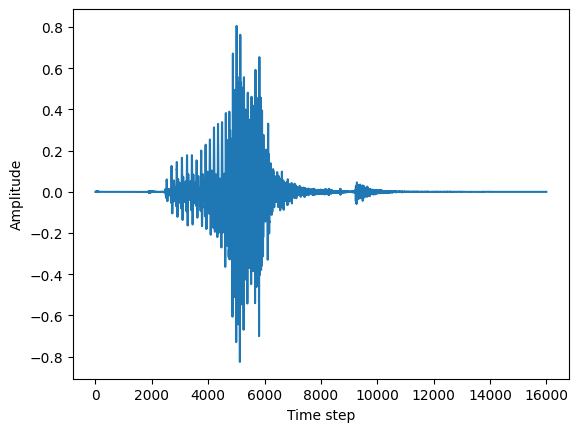

In [7]:
plt.xlabel("Time step")
plt.ylabel("Amplitude")
plt.plot(speech_wav);

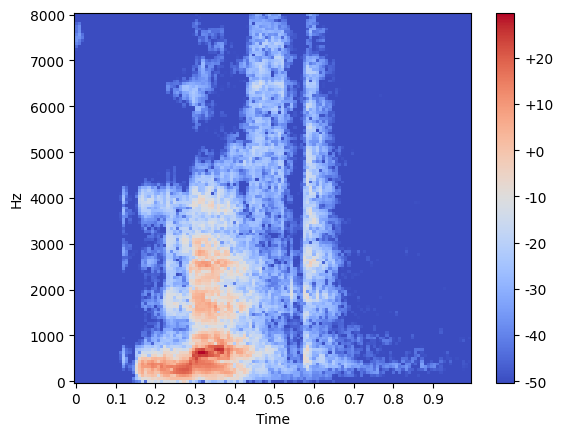

In [8]:
speech_spectrogram = librosa.stft(speech_wav, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
speech_spectrogram = np.abs(speech_spectrogram) ** 2
log_speech_spectrogram = librosa.power_to_db(speech_spectrogram)

librosa.display.specshow(log_speech_spectrogram, sr=speech_sr, hop_length=HOP_SIZE, x_axis="time", y_axis="linear")
plt.colorbar(format="%+2.f");

# Idel

In [26]:
idel_wav_file_path = "./LESSI noise/Idel.wav"
idel_wav, sr = librosa.load(idel_wav_file_path)
sr

22050

In [27]:
idel_wav = idel_wav[:200000]
ipd.Audio(idel_wav, rate=sr)

In [29]:
idel_wav = librosa.resample(y=idel_wav, orig_sr=sr, target_sr=speech_sr)
ipd.Audio(idel_wav, rate=speech_sr)

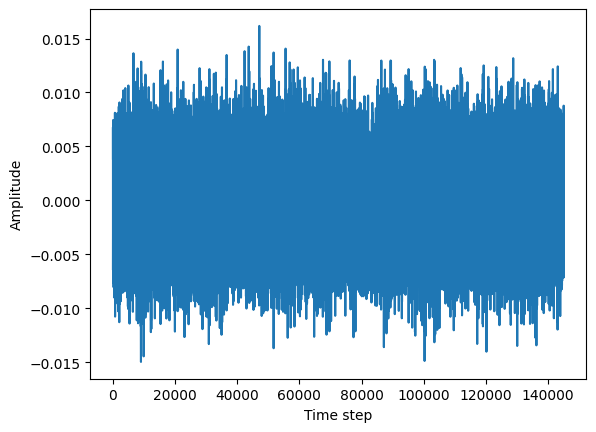

In [12]:
plt.xlabel("Time step")
plt.ylabel("Amplitude")
plt.plot(ideal_wav);

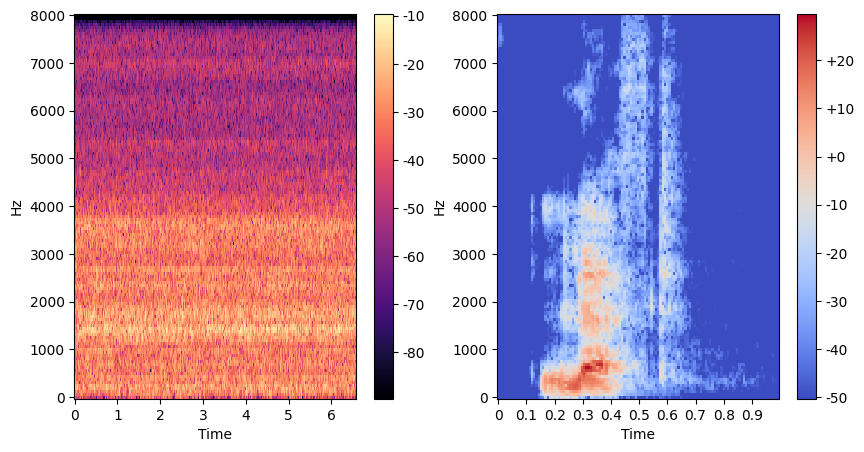

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

idel_spectrogram = librosa.stft(idel_wav, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
idel_spectrogram = np.abs(idel_spectrogram) ** 2
log_idel_spectrogram = librosa.power_to_db(idel_spectrogram)

plt_0 = librosa.display.specshow(log_idel_spectrogram, sr=speech_sr, hop_length=HOP_SIZE, x_axis="time", y_axis="linear", ax=axs[0])
plt.colorbar(plt_0, format="%+2.f", ax=axs[0]);

plt_1 = librosa.display.specshow(log_speech_spectrogram, sr=speech_sr, hop_length=HOP_SIZE, x_axis="time", y_axis="linear", ax=axs[1])
plt.colorbar(plt_1, format="%+2.f", ax=axs[1]);

# Walk

In [14]:
walk_wav_file_path = "./LESSI noise/Walk.wav"
walk_wav, sr = librosa.load(walk_wav_file_path)
sr             

22050

In [15]:
walk_wav = walk_wav[50000:250000]
ipd.Audio(walk_wav, rate=sr)

In [16]:
walk_wav = librosa.resample(y=walk_wav, orig_sr=sr, target_sr=speech_sr)
ipd.Audio(walk_wav, rate=speech_sr)

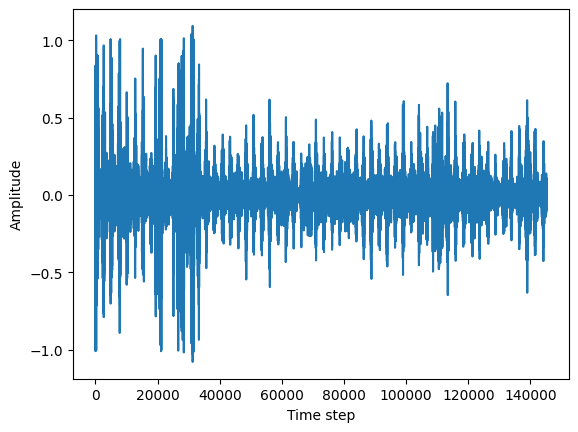

In [17]:
plt.xlabel("Time step")
plt.ylabel("Amplitude")
plt.plot(walk_wav);

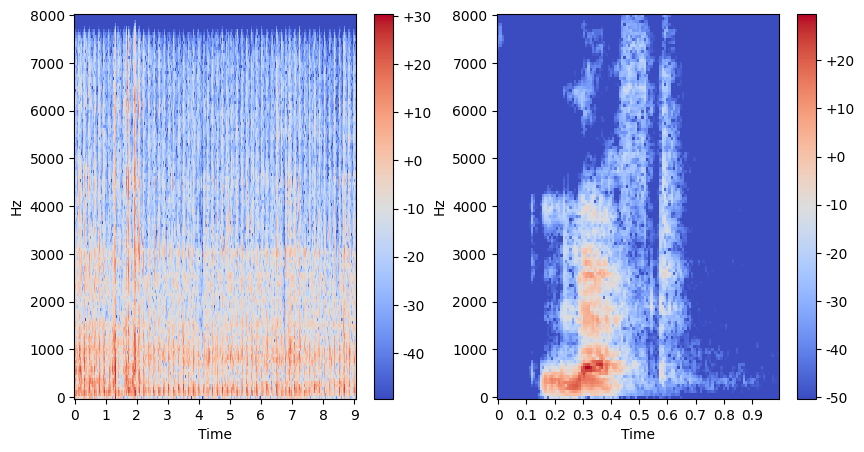

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

walk_spectrogram = librosa.stft(walk_wav, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
walk_spectrogram = np.abs(walk_spectrogram) ** 2
log_walk_spectrogram = librosa.power_to_db(walk_spectrogram)

plt_0 = librosa.display.specshow(log_walk_spectrogram, sr=speech_sr, hop_length=HOP_SIZE, x_axis="time", y_axis="linear", ax=axs[0])
plt.colorbar(plt_0, format="%+2.f", ax=axs[0]);

plt_1 = librosa.display.specshow(log_speech_spectrogram, sr=speech_sr, hop_length=HOP_SIZE, x_axis="time", y_axis="linear", ax=axs[1])
plt.colorbar(plt_1, format="%+2.f", ax=axs[1]);